In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def my_sample_mean(passed_array):
    return(passed_array.sum()/passed_array.size)

def my_sample_var(passed_array):
    mean = my_sample_mean(passed_array)
    new_array = (passed_array - mean)
    new_array = new_array*new_array
    return(new_array.sum()/(new_array.size - 1))

In [3]:
bus = np.array([4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1])

print("The sample mean is:", my_sample_mean(bus))
print("The sample variance is:", my_sample_var(bus))

The sample mean is: 43.375
The sample variance is: 5884.516666666666


In [4]:
def update_mean(prev_mean, xn, n):
    new_mean = prev_mean + (xn - prev_mean)/n
    return(new_mean)


In [5]:
buffbus_bad_means = np.array([7])
prev_mean = 7

for x in range(2, 16):
    buffbus_bad_means = np.append(buffbus_bad_means, update_mean(prev_mean,bus[x],x+1))
    prev_mean = update_mean(prev_mean,bus[x],x+1)

print("Means:")
for x in range(15):
    print(buffbus_bad_means[x])

Means:
7.0
4.666666666666666
81.5
69.6
64.5
66.85714285714286
60.875
55.0
55.5
50.54545454545455
46.583333333333336
49.15384615384615
48.64285714285714
46.199999999999996
43.37499999999999


In [6]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

In [7]:
file_path = 'foot_smart.csv'
dfFootIQ = pd.read_csv(file_path)

dfFootIQ.head(1500)

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500K
1,6.76,7,0,21.3,West,500K
2,6.96,7,1,22.2,East,500K
3,7.86,8,1,25.3,East,100K
4,8.17,9,0,23.9,East,100K
...,...,...,...,...,...,...
1495,6.89,7,0,22.9,South,1K
1496,6.03,7,0,18.8,North,1K
1497,8.83,9,1,26.0,North,1M
1498,7.73,8,0,23.6,North,100K


In [8]:
def clean_city_size(data):
    
    # We make sure the value isn't missing for safety
    if pd.isnull(data):
        return data
    
    # Removing white space 
    stripped_data = data.strip()
    
    # Converting K and M to zeroes
    data_str = stripped_data.replace('K', '000').replace('M', '000000')
    
    # Converting to an int
    int_data = int(data_str)
    
    return int_data

# Running the function to clean every member of the city_size column
dfFootIQ.loc[:, "city_size"] = dfFootIQ.loc[:,"city_size"].apply(clean_city_size)

In [9]:
dfFootIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   foot_length  1500 non-null   float64
 1   shoe_size    1500 non-null   int64  
 2   sex          1500 non-null   int64  
 3   IQ           1500 non-null   float64
 4   US_section   1500 non-null   object 
 5   city_size    1500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 70.4+ KB


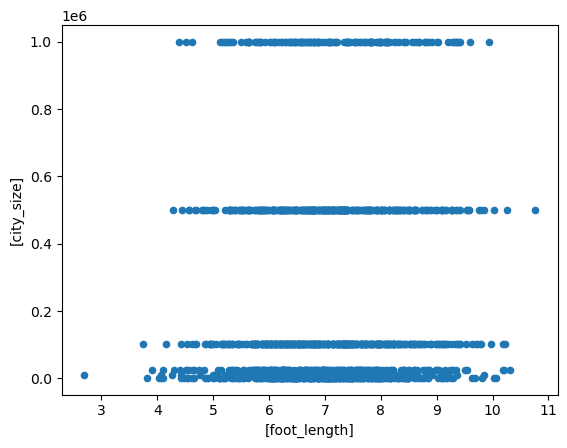

In [10]:
ax1 = dfFootIQ.plot.scatter(x=['foot_length'], y=['city_size'])

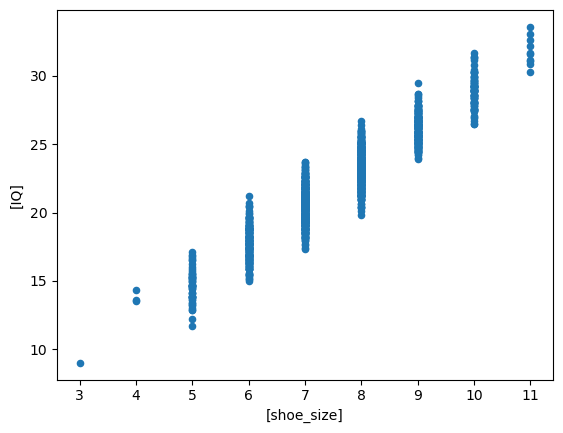

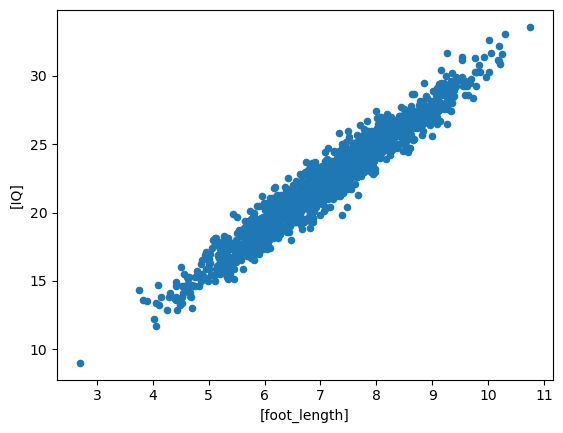

In [11]:
ax2 = dfFootIQ.plot.scatter(x=['shoe_size'], y=['IQ'])
ax3 = dfFootIQ.plot.scatter(x=['foot_length'], y=['IQ'])

In [12]:
print("Mean shoe size of the provided data:",dfFootIQ['shoe_size'].mean())

Mean shoe size of the provided data: 7.556666666666667


In [13]:
print("After adding 2 to each element of the data set, the new mean is",dfFootIQ['shoe_size'].apply(lambda x: x + 2).mean())

After adding 2 to each element of the data set, the new mean is 9.556666666666667


In [14]:
print("After multiplying each element of the data set by 3, the new mean is",dfFootIQ['shoe_size'].apply(lambda x: x * 3).mean())

After multiplying each element of the data set by 3, the new mean is 22.67


In [15]:
print("Sample Variance shoe size of the provided data:",dfFootIQ['shoe_size'].var())

Sample Variance shoe size of the provided data: 1.4984545252390487


In [16]:
print("After adding 2 to each element of the data set, the new sample variance is",dfFootIQ['shoe_size'].apply(lambda x: x + 2).var())

After adding 2 to each element of the data set, the new sample variance is 1.4984545252390487


In [17]:
print("After multiplying each element of the data set by 3, the new sample variance is",dfFootIQ['shoe_size'].apply(lambda x: x * 3).var())

After multiplying each element of the data set by 3, the new sample variance is 13.486090727151158


In [18]:
file_path_2 = 'titanic_data.csv'
titanicData = pd.read_csv(file_path_2)

titanicData.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,4.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,24.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,NaN,0,0,111369,30.0000,C148,C


In [19]:
dfTitanic = titanicData.dropna(subset=["Survived", "Pclass", "Age", "Sex"]).copy()
dfTitanic.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,18.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,30.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,4.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,24.0,0,0,112053,30.0000,B42,S


In [20]:
num_survived = dfTitanic['Survived'].sum()
num_people = len(dfTitanic)

prop_survived = num_survived / num_people
prop_survived = prop_survived.round(decimals=4)

print("The proportion of people who survived the trajedy is", prop_survived)

The proportion of people who survived the trajedy is 0.3908


In [21]:
# Calculating the percentage of males survived
men_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Survived"] ==1), ["PassengerId"]])
total_men=len(dfTitanic.loc[(dfTitanic["Sex"] =='male')])
print("{} percent of males survived.".format((men_survived / total_men) * 100))

# Calculating the percentage of females survived
women_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Survived"] ==1), ["PassengerId"]])
total_women=len(dfTitanic.loc[(dfTitanic["Sex"] =='female')])
print("{} percent of females survived.".format((women_survived / total_women) * 100))

print("")
#================================================================================

# Calculating the percentage of 1st class passengers survived
first_class_survived=len(dfTitanic.loc[(dfTitanic["Pclass"] == 1) & (dfTitanic["Survived"] ==1), ["PassengerId"]])
total_first_class=len(dfTitanic.loc[(dfTitanic["Pclass"] == 1)])
print("{} percent of first class passengers survived.".format((first_class_survived / total_first_class) * 100))

# Calculating the percentage of 2nd class passengers survived
second_class_survived=len(dfTitanic.loc[(dfTitanic["Pclass"] == 2) & (dfTitanic["Survived"] ==1), ["PassengerId"]])
total_second_class=len(dfTitanic.loc[(dfTitanic["Pclass"] == 2)])
print("{} percent of second class passengers survived.".format((second_class_survived / total_second_class) * 100))

# Calculating the percentage of 3rd class passengers survived
third_class_survived=len(dfTitanic.loc[(dfTitanic["Pclass"] == 3) & (dfTitanic["Survived"] ==1), ["PassengerId"]])
total_third_class=len(dfTitanic.loc[(dfTitanic["Pclass"] == 3)])
print("{} percent of third class passengers survived.".format((third_class_survived / total_third_class) * 100))

print("")
#================================================================================

# Calculating the percentage of 1st class male passengers survived
first_class_men_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Survived"] ==1) & (dfTitanic["Pclass"] == 1), ["PassengerId"]])
total_first_class_men=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Pclass"] == 1)])
print("{} percent of first class males survived.".format((first_class_men_survived / total_first_class_men) * 100))

# Calculating the percentage of 1st class female passengers survived
first_class_women_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Survived"] ==1) & (dfTitanic["Pclass"] == 1), ["PassengerId"]])
total_first_class_women=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Pclass"] == 1)])
print("{} percent of first class females survived.".format((first_class_women_survived / total_first_class_women) * 100))

# Calculating the percentage of 2nd class male passengers survived
second_class_men_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Survived"] ==1) & (dfTitanic["Pclass"] == 2), ["PassengerId"]])
total_second_class_men=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Pclass"] == 2)])
print("{} percent of second class males survived.".format((second_class_men_survived / total_second_class_men) * 100))

# Calculating the percentage of 2nd class female passengers survived
second_class_women_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Survived"] ==1) & (dfTitanic["Pclass"] == 2), ["PassengerId"]])
total_second_class_women=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Pclass"] == 2)])
print("{} percent of second class females survived.".format((second_class_women_survived / total_second_class_women) * 100))

# Calculating the percentage of 3rd class male passengers survived
third_class_men_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Survived"] ==1) & (dfTitanic["Pclass"] == 3), ["PassengerId"]])
total_third_class_men=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Pclass"] == 3)])
print("{} percent of third class males survived.".format((third_class_men_survived / total_third_class_men) * 100))

# Calculating the percentage of 3rd class female passengers survived
third_class_women_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Survived"] ==1) & (dfTitanic["Pclass"] == 3), ["PassengerId"]])
total_third_class_women=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Pclass"] == 3)])
print("{} percent of third class females survived.".format((third_class_women_survived / total_third_class_women) * 100))

19.654427645788335 percent of males survived.
74.9003984063745 percent of females survived.

64.28571428571429 percent of first class passengers survived.
48.275862068965516 percent of second class passengers survived.
25.187032418952622 percent of third class passengers survived.

38.70967741935484 percent of first class males survived.
96.0 percent of first class females survived.
18.39080459770115 percent of second class males survived.
93.10344827586206 percent of second class females survived.
13.780918727915195 percent of third class males survived.
52.54237288135594 percent of third class females survived.


In [22]:
median_age_survived = dfTitanic.loc[(dfTitanic["Survived"] ==1), ["Age"]].median()
median_age_survived = int(median_age_survived)
median_age_died = dfTitanic.loc[(dfTitanic["Survived"] ==0), ["Age"]].median()
median_age_died = int(median_age_died)

print("The survivors had a median age of {}".format(median_age_survived))
print("Meanwhile, the deceased had a median age of {}".format(median_age_died))

The survivors had a median age of 27
Meanwhile, the deceased had a median age of 29


In [23]:
IQR_survived = dfTitanic.loc[(dfTitanic["Survived"] ==1), ["Age"]].quantile(.75) - dfTitanic.loc[(dfTitanic["Survived"] ==1), ["Age"]].quantile(.25)
IQR_survived = float(IQR_survived)
print("The IQR for passengers survived is", IQR_survived)

IQR_died = dfTitanic.loc[(dfTitanic["Survived"] ==0), ["Age"]].quantile(.75) - dfTitanic.loc[(dfTitanic["Survived"] ==0), ["Age"]].quantile(.25)
IQR_died = float(IQR_died)
print("The IQR for passengers died is", IQR_died)


The IQR for passengers survived is 18.5
The IQR for passengers died is 17.75


<AxesSubplot:title={'center':'Ages of Passengers who Died'}, ylabel='Age'>

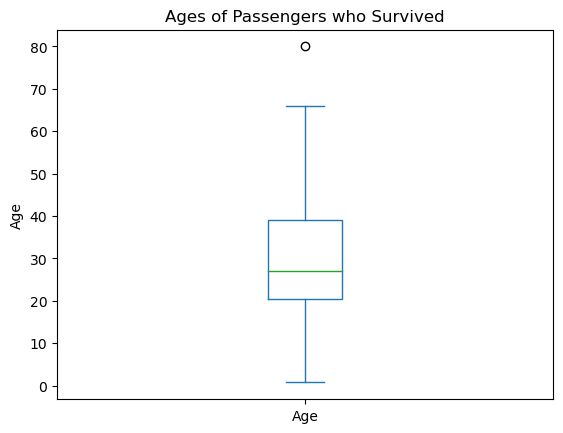

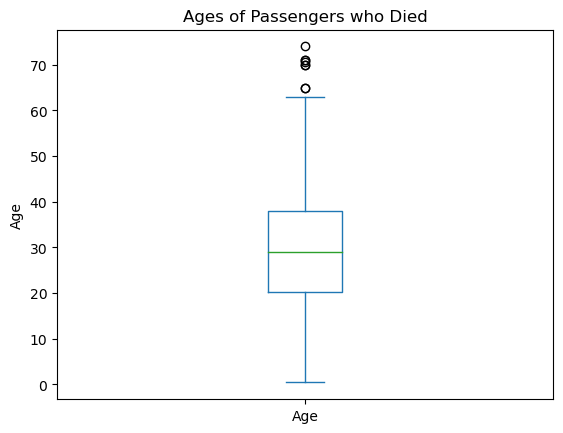

In [24]:
dfTitanic.loc[(dfTitanic["Survived"] ==1), ["Age"]].plot.box(title="Ages of Passengers who Survived",ylabel="Age")
dfTitanic.loc[(dfTitanic["Survived"] ==0), ["Age"]].plot.box(title="Ages of Passengers who Died",ylabel="Age")

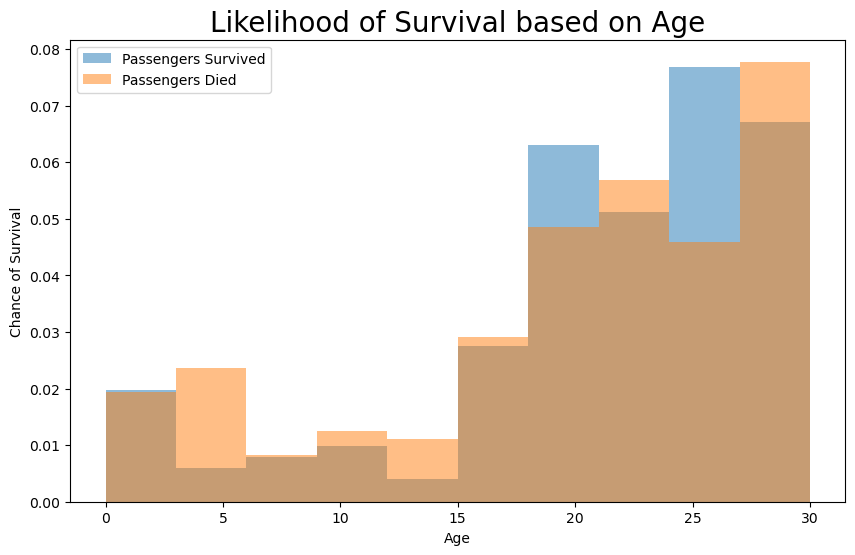

In [25]:
G
bin_edges = range(0,31,3)
dataSurvived = dfTitanic.loc[(dfTitanic["Survived"] ==1), ["Age"]]
dataDied = dfTitanic.loc[(dfTitanic["Survived"] ==0), ["Age"]]

ax.hist(dataSurvived, label='Passengers Survived', bins = bin_edges, density=1, alpha=0.5)
ax.hist(dataDied, label='Passengers Died', bins = bin_edges, density=1, alpha=0.5)
ax.set_title("Likelihood of Survival based on Age", fontsize=20)
ax.set_xlabel("Age")
ax.set_ylabel("Chance of Survival")
plt.legend()